In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
!unzip '/content/Weather of 187 countries in 2020.zip' -d '/content/'

Archive:  /content/Weather of 187 countries in 2020.zip
  inflating: /content/the weather of 155 countries in 2020.csv  
  inflating: /content/the weather of 187 countries in 2020.csv  


In [3]:
df = pd.read_csv("/content/the weather of 187 countries in 2020.csv")

<ipython-input-3-2fc1b8421c2e>:1: DtypeWarning: Columns (16,17,18,19,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/the weather of 187 countries in 2020.csv")


In [4]:
df.shape

(1392575, 23)

In [5]:
df.head()

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,...,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,TZ000063894,Comoros,2020-01-22,2020,1,22,10.9,NaN,27.6,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020,1,23,0.0,NaN,26.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,2020-01-24,2020,1,24,9.4,NaN,27.9,30.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TZ000063894,Comoros,2020-01-25,2020,1,25,0.3,NaN,27.9,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TZ000063894,Comoros,2020-01-26,2020,1,26,0.0,NaN,28.2,31.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
series = df.isnull().sum() / len(df)
series.sort_values(ascending = False)

WESD               0.999999
MDPR               0.999942
SNWD_ATTRIBUTES    0.999746
DAPR               0.999072
TAVG_ATTRIBUTES    0.997235
TMAX_ATTRIBUTES    0.995952
TMIN_ATTRIBUTES    0.995782
PRCP_ATTRIBUTES    0.995686
LATITUDE           0.924785
ELEVATION          0.924785
LONGITUDE          0.924785
SNOW               0.924319
SNWD               0.728970
TMAX               0.377624
TAVG               0.369059
TMIN               0.354878
PRCP               0.250763
Country/Region     0.000000
Day                0.000000
Month              0.000000
Year               0.000000
DATE               0.000000
STATION            0.000000
dtype: float64

In [7]:
df.describe()

,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,SNOW,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,WESD
count,1392575.0,1.392575e+06,1.392575e+06,1.043369e+06,377429.000000,878632.000000,866705.000000,898381.000000,105392.000000,104742.000000,104742.000000,104742.000000,1293.000000,81.000000,2.000000
mean,2020.0,4.279517e+00,1.595168e+01,2.564688e+00,120.712848,14.814992,17.412551,7.093554,3.742760,37.689351,71.371220,787.542437,5.292343,0.958025,0.050000
std,0.0,1.812637e+00,8.770296e+00,8.035237e+00,293.874318,13.063075,12.707588,12.227766,19.093372,11.572761,71.760255,1094.757321,7.121322,1.653137,0.070711
min,2020.0,1.000000e+00,1.000000e+00,0.000000e+00,-20.000000,-56.200000,-55.000000,-65.000000,0.000000,-17.817000,-140.850000,0.600000,1.000000,0.000000,0.000000
25%,2020.0,3.000000e+00,8.000000e+00,0.000000e+00,0.000000,6.700000,8.400000,0.000000,0.000000,30.667000,75.983000,68.000000,2.000000,0.000000,0.025000
50%,2020.0,4.000000e+00,1.600000e+01,0.000000e+00,0.000000,16.800000,18.500000,7.700000,0.000000,37.850000,104.500000,250.000000,3.000000,0.280000,0.050000
75%,2020.0,6.000000e+00,2.400000e+01,1.500000e+00,99.000000,25.600000,27.222222,15.600000,0.000000,45.217000,116.117000,1099.000000,5.000000,1.510000,0.075000
max,2020.0,7.000000e+00,3.100000e+01,4.849000e+02,52900.000000,43.300000,51.200000,36.700000,625.000000,82.500000,131.983000,4701.000000,61.000000,9.240000,0.100000


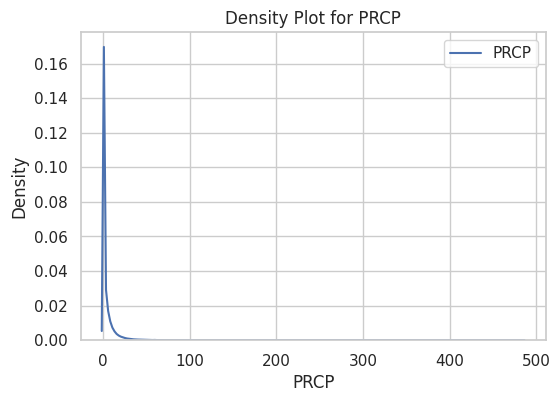

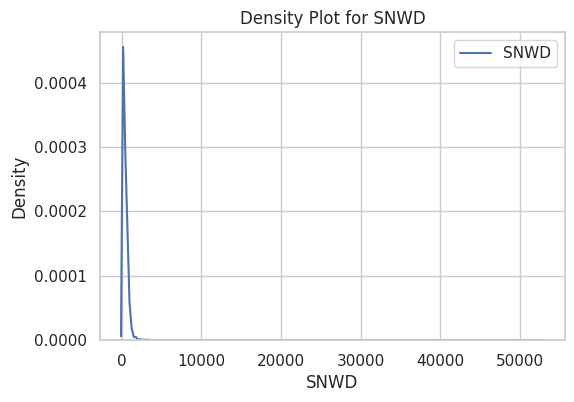

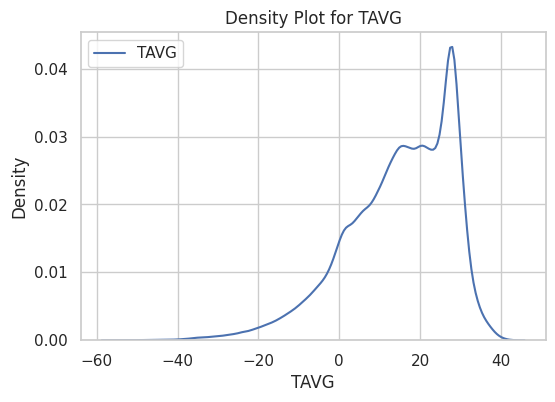

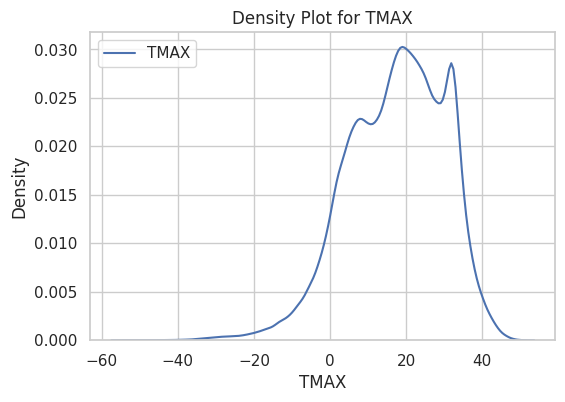

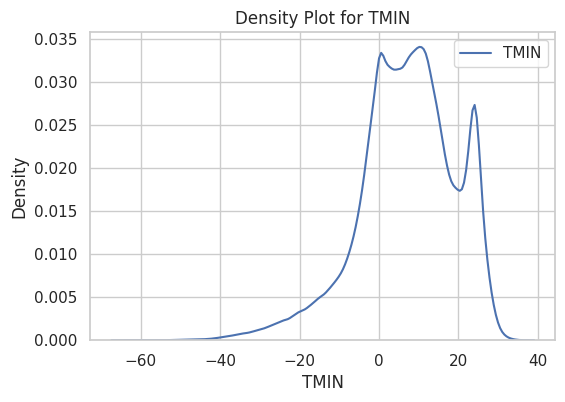

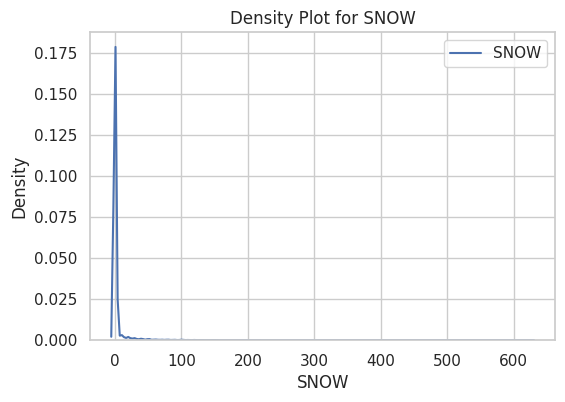

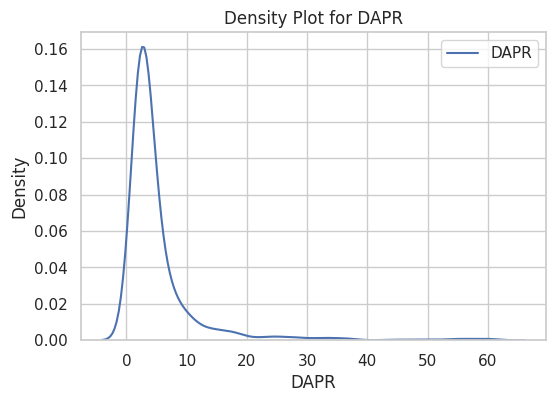

In [25]:
numeric = ['PRCP', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'SNOW', 'DAPR']

# Create a new DataFrame with only the selected columns
num_df = df[numeric]

# Set the style of the plots (optional)
sns.set(style="whitegrid")

# Plot density plots for each selected column
for column in numeric:
  plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
  sns.kdeplot(data=num_df[column], label=column)
  plt.xlabel(column)
  plt.ylabel('Density')
  plt.title(f'Density Plot for {column}')
  plt.legend()
  plt.show()  # Display the individual plot within the same cell

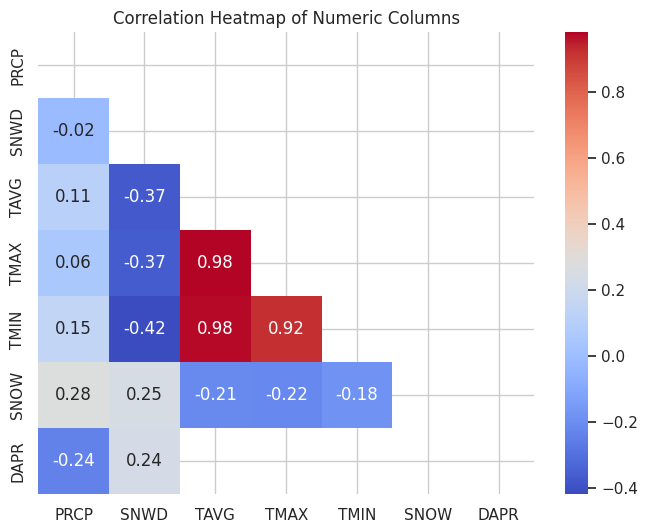

In [9]:
#Heatmap
correlation_matrix = num_df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask = mask)

# Set the title
plt.title('Correlation Heatmap of Numeric Columns')

# Show the plot
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392575 entries, 0 to 1392574
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   STATION          1392575 non-null  object 
 1   Country/Region   1392575 non-null  object 
 2   DATE             1392575 non-null  object 
 3   Year             1392575 non-null  int64  
 4   Month            1392575 non-null  int64  
 5   Day              1392575 non-null  int64  
 6   PRCP             1043369 non-null  float64
 7   SNWD             377429 non-null   float64
 8   TAVG             878632 non-null   float64
 9   TMAX             866705 non-null   float64
 10  TMIN             898381 non-null   float64
 11  SNOW             105392 non-null   float64
 12  LATITUDE         104742 non-null   float64
 13  LONGITUDE        104742 non-null   float64
 14  ELEVATION        104742 non-null   float64
 15  PRCP_ATTRIBUTES  6007 non-null     object 
 16  TAVG_ATTRIBUTES  3

In [11]:
df['Month'].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [12]:
#Grouping by season
df_month_temp = df.groupby(by = 'Month', as_index = False).agg({'TAVG' : np.mean})

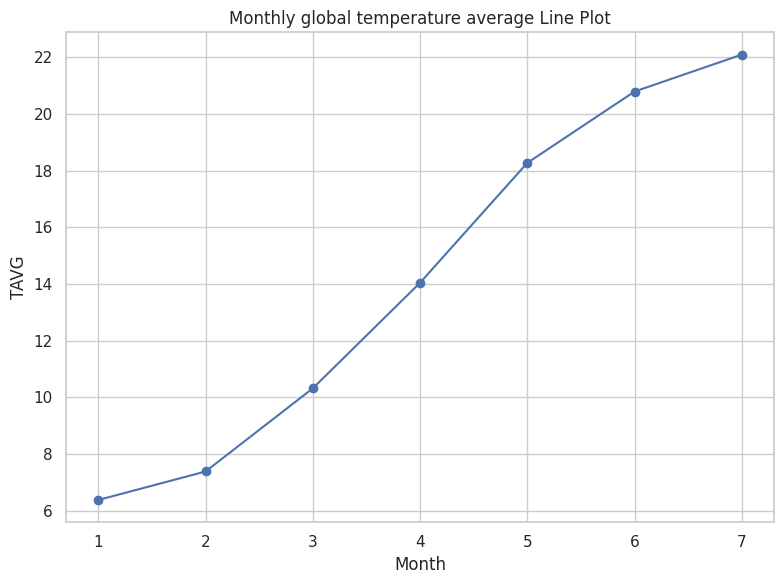

In [13]:
months = df_month_temp['Month']
tavg = df_month_temp['TAVG']

# Create a line plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.plot(months, tavg, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('TAVG')
plt.title('Monthly global temperature average Line Plot')

# Show the plot
plt.grid(True)
plt.tight_layout()

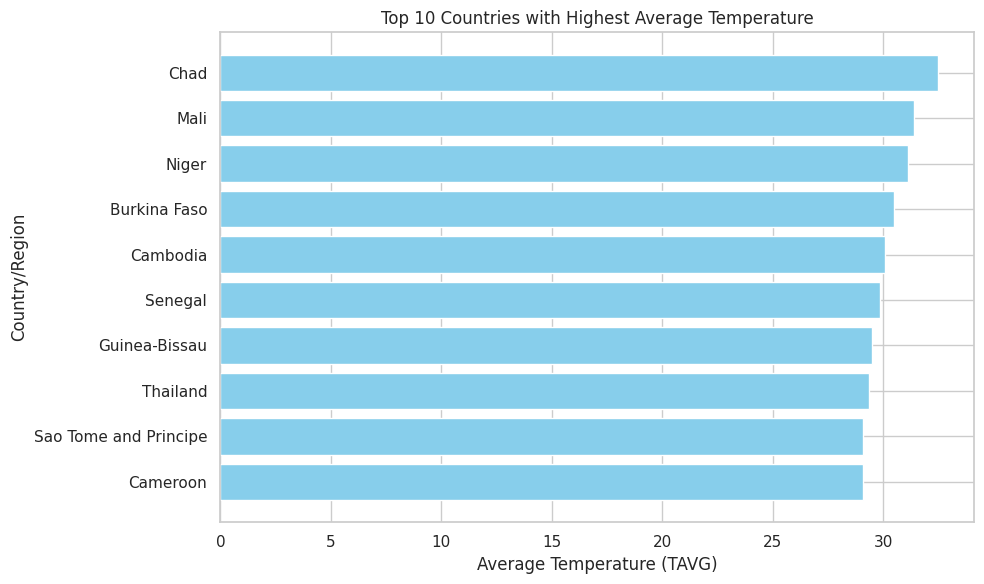

In [14]:
average_temperatures = df.groupby('Country/Region')['TAVG'].mean().reset_index()

# Sort the DataFrame by average temperature in descending order
average_temperatures_sorted = average_temperatures.sort_values(by='TAVG', ascending=False)

# Select the top 10 countries
top_10_countries = average_temperatures_sorted.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.barh(top_10_countries['Country/Region'], top_10_countries['TAVG'], color='skyblue')

# Set labels and title
plt.xlabel('Average Temperature (TAVG)')
plt.ylabel('Country/Region')
plt.title('Top 10 Countries with Highest Average Temperature')

# Show the plot
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest temperature at the top
plt.tight_layout()
plt.show()

In [15]:
df2 = df[['Country/Region','Day','Month','Year','DATE','STATION','PRCP','TAVG','TMIN', 'TMAX']]
df2.head()

,Country/Region,Day,Month,Year,DATE,STATION,PRCP,TAVG,TMIN,TMAX
0,Comoros,22,1,2020,2020-01-22,TZ000063894,10.9,27.6,24.9,30.2
1,Comoros,23,1,2020,2020-01-23,TZ000063894,0.0,26.7,NaN,NaN
2,Comoros,24,1,2020,2020-01-24,TZ000063894,9.4,27.9,25.6,30.6
3,Comoros,25,1,2020,2020-01-25,TZ000063894,0.3,27.9,16.3,30.2
4,Comoros,26,1,2020,2020-01-26,TZ000063894,0.0,28.2,NaN,31.5


<Axes: >

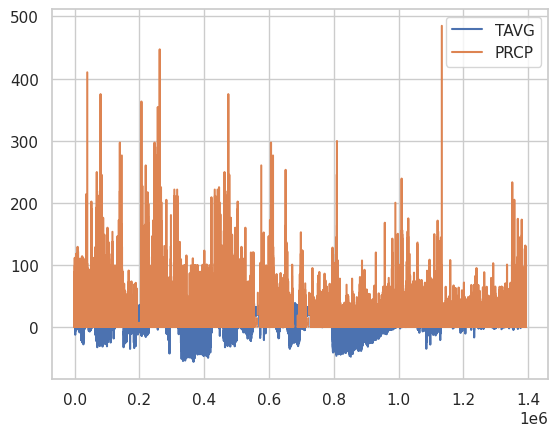

In [16]:
df2[['TAVG','PRCP']].plot()

Text(0.5, 1.0, 'Scatter Plot of precipitation vs Average temperature')

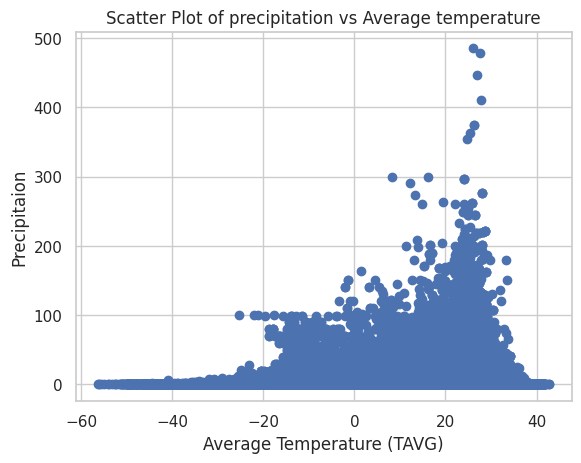

In [17]:
plt.scatter(df2['TAVG'],df2['PRCP'])
# Set labels and title
plt.xlabel('Average Temperature (TAVG)')
plt.ylabel('Precipitaion')
plt.title('Scatter Plot of precipitation vs Average temperature')

<ipython-input-18-cf018d614a79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PRCP'].fillna(df2['PRCP'].median(), inplace=True)


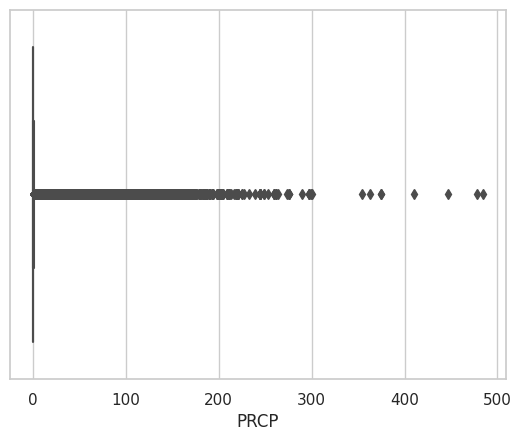

In [18]:
df2['PRCP'].fillna(df2['PRCP'].median(), inplace=True)
plot2 = sns.boxplot(x = 'PRCP', data = df2)

<ipython-input-23-b1060da2db7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col].fillna(df2[col].median(), inplace=True)


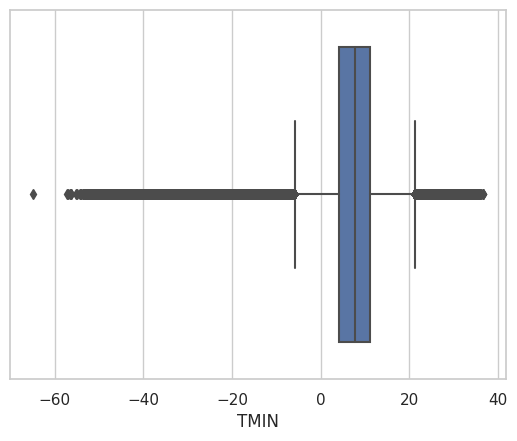

<ipython-input-23-b1060da2db7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col].fillna(df2[col].median(), inplace=True)


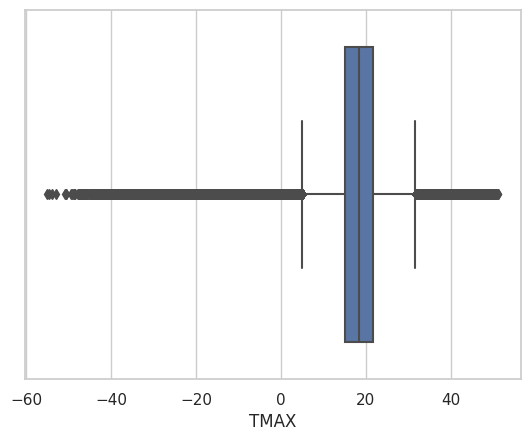

In [23]:
num = ['TMIN', 'TMAX']
for col in num:
  df2[col].fillna(df2[col].median(), inplace=True)
  plot = sns.boxplot(x = col, data = df2)
  plt.show()

Coefficients: [0.05216656]
Intercept: 15.446169714428677
Mean Squared Error: 107.92581838239238


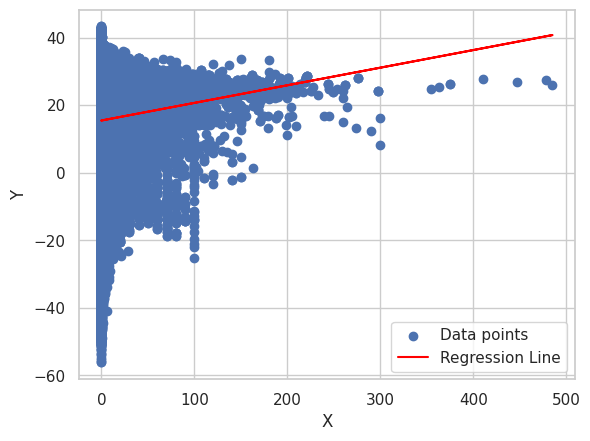

In [41]:
# Split the data into input (X) and target (Y)
X = df2[['PRCP']]
Y = df2['TAVG']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate the coefficients and intercept of the linear regression model
coefficients = model.coef_
intercept = model.intercept_

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(Y_test, Y_pred)

# Print the coefficients, intercept, and MSE
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error: {mse}')

# Plot the regression line
plt.scatter(X, Y, label='Data points')
plt.plot(X_test, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Coefficients: [1.93980492]
Intercept: 7.2466075977328135
Mean Squared Error: 95.82805590531233


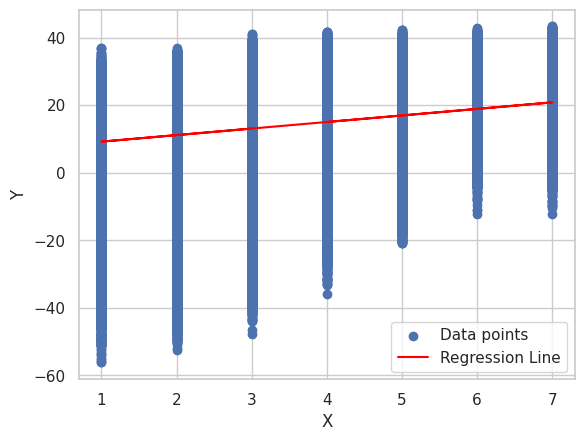

In [59]:
# Split the data into input (X) and target (Y)
X = df2[['Month']]
Y = df2['TAVG']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate the coefficients and intercept of the linear regression model
coefficients = model.coef_
intercept = model.intercept_

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(Y_test, Y_pred)

# Print the coefficients, intercept, and MSE
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error: {mse}')

# Plot the regression line
plt.scatter(X, Y, label='Data points')
plt.plot(X_test, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [45]:
df3 = df2[df2['Country/Region'] == 'India'].reset_index()
df3.head()

,index,Country/Region,Day,Month,Year,DATE,STATION,PRCP,TAVG,TMIN,TMAX
0,589897,India,22,1,2020,2020-01-22,IN017111200,0.0,22.5,16.1,18.5
1,589898,India,23,1,2020,2020-01-23,IN017111200,0.0,24.1,18.5,18.5
2,589899,India,24,1,2020,2020-01-24,IN017111200,0.0,23.2,7.7,18.5
3,589900,India,25,1,2020,2020-01-25,IN017111200,0.0,21.4,7.7,18.5
4,589901,India,26,1,2020,2020-01-26,IN017111200,0.0,21.3,7.7,18.5


In [50]:
df3.describe()

,index,Day,Month,Year,PRCP,TAVG,TMIN,TMAX
count,23007.000000,23007.000000,23007.000000,23007.0,23007.000000,23007.000000,23007.000000,23007.000000
mean,601400.000000,15.939931,4.275873,2020.0,3.611179,26.932425,18.625718,24.774464
std,6641.693158,8.784289,1.821372,0.0,13.572305,5.537460,7.474875,8.144783
min,589897.000000,1.000000,1.000000,2020.0,0.000000,1.200000,-6.100000,5.500000
25%,595648.500000,8.000000,3.000000,2020.0,0.000000,24.200000,11.400000,18.500000
50%,601400.000000,16.000000,4.000000,2020.0,0.000000,28.000000,20.900000,18.500000
75%,607151.500000,24.000000,6.000000,2020.0,0.000000,30.600000,24.900000,32.800000
max,612903.000000,31.000000,7.000000,2020.0,296.900000,42.300000,33.900000,50.000000


In [49]:
df3.groupby('Month')['PRCP'].mean()

Month
1     0.289280
2     0.402711
3     1.002112
4     1.479062
5     2.513897
6     7.647985
7    10.354688
Name: PRCP, dtype: float64

Coefficients: [1.93980492]
Intercept: 7.2466075977328135
Mean Squared Error: 95.82805590531233


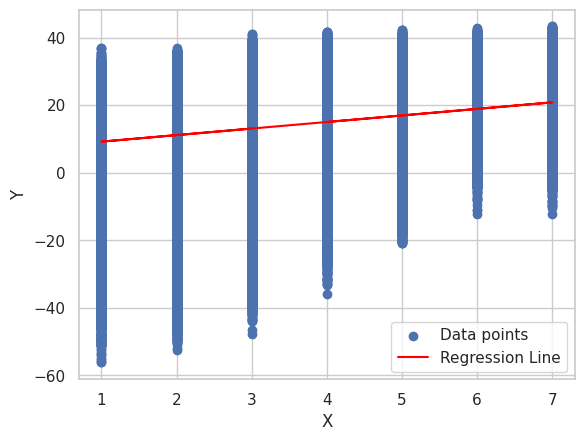

In [79]:
# Split the data into input (X) and target (Y)
X = df2[['Month']]
Y = df2['TAVG']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate the coefficients and intercept of the linear regression model
coefficients = model.coef_
intercept = model.intercept_

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(Y_test, Y_pred)

# Print the coefficients, intercept, and MSE
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error: {mse}')

# Plot the regression line
plt.scatter(X, Y, label='Data points')
plt.plot(X_test, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## **Regression and Optimization**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df_final.drop(columns=['TAVG'])  # Features (all columns except 'TAVG')
y = df_final['TAVG']  # Target variable

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
scaler = StandardScaler()
model = LinearRegression()

X_train_scaled = scaler.fit_transform(X_train)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 35.196346417438654
R-squared (R2): 0.6742749260050944


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

#Hyperparameter tuning
param_grid = {
    'Ridge Regression': {   # Whether to normalize the features or not
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10]  # Different alpha values for Ridge
    },
    'Lasso Regression': {   # Whether to normalize the features or not
        'alpha': [0.001, 0.01, 0.1, 1.0]  # Different alpha values for Lasso
    }
}

# Create a dictionary mapping model names to their corresponding classes
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Iterate over each model and perform grid search
for model_name, model in models.items():
  print(f"Hyperparameter tuning for {model_name}")

  grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name],
                              scoring='neg_mean_squared_error', cv=5, return_train_score=True)
  grid_search.fit(X_train, y_train)

  best_params = grid_search.best_params_
  best_mse = -grid_search.best_score_
  print(f"Best Hyperparameters for {model_name}:", best_params)
  print(f"Best Mean Squared Error for {model_name}:", best_mse)

  # Access the training and validation scores
  train_scores = -grid_search.cv_results_['mean_train_score']
  val_scores = -grid_search.cv_results_['mean_test_score']

  print(f"Mean Squared Error on Training Data for {model_name}:", train_scores)
  print(f"Mean Squared Error on Validation Data for {model_name}:", val_scores)

  best_model = grid_search.best_estimator_

  y_pred = best_model.predict(X_test)
  test_mse = mean_squared_error(y_test, y_pred)
  print(f"Mean Squared Error on Test Data for {model_name}:", test_mse)
  print()

Hyperparameter tuning for Ridge Regression
Best Hyperparameters for Ridge Regression: {'alpha': 10}
Best Mean Squared Error for Ridge Regression: 35.66761201935984
Mean Squared Error on Training Data for Ridge Regression: [35.66722375 35.66722375 35.66722375 35.66722375 35.66722375 35.66722375]
Mean Squared Error on Validation Data for Ridge Regression: [35.66761202 35.66761202 35.66761202 35.66761202 35.66761202 35.66761202]
Mean Squared Error on Test Data for Ridge Regression: 35.19634644192423

Hyperparameter tuning for Lasso Regression
Best Hyperparameters for Lasso Regression: {'alpha': 0.001}
Best Mean Squared Error for Lasso Regression: 35.667612021066574
Mean Squared Error on Training Data for Lasso Regression: [35.66722381 35.66722674 35.66755159 35.68212938]
Mean Squared Error on Validation Data for Lasso Regression: [35.66761202 35.66761449 35.66793492 35.6824414 ]
Mean Squared Error on Test Data for Lasso Regression: 35.19631934072861



Applying grid search, we found that the best parameters using Ridge regularisation was alpha = 10, which gave a mean squared error of 35.196 on the final test data.
Applying grid search, we found that the best parameters using Lasso regularisation was alpha = 0.0010, which gave a mean squared error of 35.196 (slightly less than Ridge regression) on the final test data.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df_final.drop(columns=['TMIN'])
y = df_final['TMIN']  # Target variable

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
scaler = StandardScaler()
model = LinearRegression()

X_train_scaled = scaler.fit_transform(X_train)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 27.23718455912234
R-squared (R2): 0.7181147158799955


We can observe that the mean square error for predicting minimum temperature is lower than for predicting the average temperature.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

#Hyperparameter tuning for prediction on TMIN
param_grid = {
    'Ridge Regression': {   # Whether to normalize the features or not
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10]  # Different alpha values for Ridge
    },
    'Lasso Regression': {   # Whether to normalize the features or not
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10]  # Different alpha values for Lasso
    }
}

# Create a dictionary mapping model names to their corresponding classes
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Iterate over each model and perform grid search
for model_name, model in models.items():
  print(f"Hyperparameter tuning for {model_name}")

  grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name],
                              scoring='neg_mean_squared_error', cv=5, return_train_score=True)
  grid_search.fit(X_train, y_train)

  best_params = grid_search.best_params_
  best_mse = -grid_search.best_score_
  print(f"Best Hyperparameters for {model_name}:", best_params)
  print(f"Best Mean Squared Error for {model_name}:", best_mse)

  # Access the training and validation scores
  train_scores = -grid_search.cv_results_['mean_train_score']
  val_scores = -grid_search.cv_results_['mean_test_score']

  print(f"Mean Squared Error on Training Data for {model_name}:", train_scores)
  print(f"Mean Squared Error on Validation Data for {model_name}:", val_scores)

  best_model = grid_search.best_estimator_

  y_pred = best_model.predict(X_test)
  test_mse = mean_squared_error(y_test, y_pred)
  print(f"Mean Squared Error on Test Data for {model_name}:", test_mse)
  print()

Hyperparameter tuning for Ridge Regression
Best Hyperparameters for Ridge Regression: {'alpha': 10}
Best Mean Squared Error for Ridge Regression: 27.611093192489655
Mean Squared Error on Training Data for Ridge Regression: [27.61081983 27.61081983 27.61081983 27.61081983 27.61081983 27.61081983]
Mean Squared Error on Validation Data for Ridge Regression: [27.61109319 27.61109319 27.61109319 27.61109319 27.61109319 27.61109319]
Mean Squared Error on Test Data for Ridge Regression: 27.237184605284487

Hyperparameter tuning for Lasso Regression
Best Hyperparameters for Lasso Regression: {'alpha': 0.0001}
Best Mean Squared Error for Lasso Regression: 27.61109318942538
Mean Squared Error on Training Data for Lasso Regression: [27.61081983 27.61081992 27.61082269 27.61112203 27.64128039 28.94314501]
Mean Squared Error on Validation Data for Lasso Regression: [27.61109319 27.61109325 27.61109537 27.61138826 27.64149428 28.94330705]
Mean Squared Error on Test Data for Lasso Regression: 27.2371

Applying grid search, we found that the best parameters using Ridge regularisation was alpha = 10, which gave a mean squared error of 27.237 for predicting minimum temperature on the final test data.
Applying grid search, we found that the best parameters using Lasso regularisation was alpha = 0.0010, which gave a mean squared error almost same as Ridge regression, but slightly higher on the final test data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df_final.drop(columns=['TMAX'])
y = df_final['TMAX']  # Target variable

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
scaler = StandardScaler()
model = LinearRegression()

X_train_scaled = scaler.fit_transform(X_train)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 32.82622266369753
R-squared (R2): 0.6718893967234958


We can observe that the mean square error for predicting minimum temperature is higher than for predicting the minimum temperature, but lowe than for predicting the average temperature. It means, it is more difficult to predict the average temperature.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

#Hyperparameter tuning for prediction on TMAX
param_grid = {
    'Ridge Regression': {   # Whether to normalize the features or not
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10]  # Different alpha values for Ridge
    },
    'Lasso Regression': {   # Whether to normalize the features or not
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10]  # Different alpha values for Lasso
    }
}

# Create a dictionary mapping model names to their corresponding classes
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Iterate over each model and perform grid search
for model_name, model in models.items():
  print(f"Hyperparameter tuning for {model_name}")

  grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name],
                              scoring='neg_mean_squared_error', cv=5, return_train_score=True)
  grid_search.fit(X_train, y_train)

  best_params = grid_search.best_params_
  best_mse = -grid_search.best_score_
  print(f"Best Hyperparameters for {model_name}:", best_params)
  print(f"Best Mean Squared Error for {model_name}:", best_mse)

  # Access the training and validation scores
  train_scores = -grid_search.cv_results_['mean_train_score']
  val_scores = -grid_search.cv_results_['mean_test_score']

  print(f"Mean Squared Error on Training Data for {model_name}:", train_scores)
  print(f"Mean Squared Error on Validation Data for {model_name}:", val_scores)

  best_model = grid_search.best_estimator_

  y_pred = best_model.predict(X_test)
  test_mse = mean_squared_error(y_test, y_pred)
  print(f"Mean Squared Error on Test Data for {model_name}:", test_mse)
  print()

Hyperparameter tuning for Ridge Regression
Best Hyperparameters for Ridge Regression: {'alpha': 10}
Best Mean Squared Error for Ridge Regression: 33.119617939144966
Mean Squared Error on Training Data for Ridge Regression: [33.11922791 33.11922791 33.11922791 33.11922791 33.11922791 33.11922791]
Mean Squared Error on Validation Data for Ridge Regression: [33.11961794 33.11961794 33.11961794 33.11961794 33.11961794 33.11961794]
Mean Squared Error on Test Data for Ridge Regression: 32.82622264921593

Hyperparameter tuning for Lasso Regression
Best Hyperparameters for Lasso Regression: {'alpha': 0.0001}
Best Mean Squared Error for Lasso Regression: 33.119617944352875
Mean Squared Error on Training Data for Lasso Regression: [33.11922791 33.11922797 33.11923093 33.119556   33.1524252  34.35665549]
Mean Squared Error on Validation Data for Lasso Regression: [33.11961794 33.11961803 33.11962084 33.11994421 33.15280964 34.35706085]
Mean Squared Error on Test Data for Lasso Regression: 32.8262

Applying grid search, we found that the best parameters using Ridge regularisation was alpha = 10, which gave a mean squared error of 32.826 for predicting maximum temperature on the final test data.

Applying grid search, we found that the best parameters using Lasso regularisation was alpha = 0.0001, which gave a mean squared error almost same as Ridge regression, but slightly lower, on the final test data.